In [4]:
pip install stable_baselines3


     |████████████████████████████████| 177 kB 4.4 MB/s eta 0:00:01
Processing /home/mzhao2/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148/gym-0.21.0-py3-none-any.whl
  Using cached torch-1.11.0-cp37-cp37m-manylinux1_x86_64.whl (750.6 MB)
  Using cached importlib_metadata-4.11.4-py3-none-any.whl (18 kB)
ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 1.5.0
    Uninstalling importlib-metadata-1.5.0:
      Successfully uninstalled importlib-metadata-1.5.0
  Attempting uninstall: gym
    Found existing installation: gym 0.18.3
    Uninstalling gym-0.18.3:
      Successfully uninstalled gym-0.18.3
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pettingzoo[all]


  Using cached PettingZoo-1.18.1-py3-none-any.whl (796 kB)
  Using cached Pillow-9.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached box2d_py-2.3.5-cp37-cp37m-manylinux1_x86_64.whl (2.1 MB)
Processing /home/mzhao2/.cache/pip/wheels/bf/24/f0/03904c208e8feef0005d5786df096e8e8eb7e128e5d988888b/hanabi_learning_environment-0.0.1-cp37-cp37m-linux_x86_64.whl
  Using cached multi_agent_ale_py-0.1.11-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (778 kB)
  Using cached chess-1.7.0-py3-none-any.whl (147 kB)
  Using cached magent-0.2.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.7 MB)
  Using cached pymunk-6.2.0-cp37-cp37m-manylinux2010_x86_64.whl (980 kB)
  Using cached pygame-2.1.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Processing /home/mzhao2/.cache/pip/wheels/81/8d/3d/b288215812e51a5dd9ed0b7ec713b982d77f1173a8d691aebb/rlcard-1.0.4-py3-none-any.whl
ERROR: pymunk 6.2.0 has requirement cffi>1.14.0, but 

In [7]:
pip install supersuit

Note: you may need to restart the kernel to use updated packages.


In [23]:
from stable_baselines3.ppo import CnnPolicy
from stable_baselines3 import PPO
from pettingzoo.butterfly import pistonball_v6
import supersuit as ss

from matplotlib import animation
import matplotlib.pyplot as plt
import gym
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"


In [10]:

env = pistonball_v6.parallel_env(n_pistons=10, time_penalty=-0.1, continuous=True, random_drop=True, random_rotate=True, ball_mass=0.75, ball_friction=0.3, ball_elasticity=1.5, max_cycles=125)




env = ss.color_reduction_v0(env, mode='B')

env = ss.resize_v1(env, x_size=84, y_size=84)


env = ss.frame_stack_v1(env, 3)


env = ss.pettingzoo_env_to_vec_env_v1(env)


env = ss.concat_vec_envs_v1(env, 8, num_cpus=4, base_class='stable_baselines3')


model = PPO(CnnPolicy, env, verbose=3, gamma=0.95, n_steps=256, ent_coef=0.0905168, learning_rate=0.00062211, vf_coef=0.042202,
            max_grad_norm=0.9, gae_lambda=0.99, n_epochs=5, clip_range=0.3, batch_size=256)
model.learn(total_timesteps=200)
model.save('policy')

env = pistonball_v6.env()
env = ss.color_reduction_v0(env, mode='B')
env = ss.resize_v1(env, x_size=84, y_size=84)
env = ss.frame_stack_v1(env, 3)



Using cuda device
Wrapping the env in a VecTransposeImage.


/home/mzhao2/anaconda3/lib/python3.7/site-packages/gym/utils/seeding.py:64: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  "Function `rng.randint(low, [high, size, dtype])` is marked as deprecated "
/home/mzhao2/anaconda3/lib/python3.7/site-packages/gym/utils/seeding.py:64: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  "Function `rng.randint(low, [high, size, dtype])` is marked as deprecated "
/home/mzhao2/anaconda3/lib/python3.7/site-packages/gym/utils/seeding.py:64: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  "Function `rng.randint(low, [

------------------------------
| time/              |       |
|    fps             | 2134  |
|    iterations      | 1     |
|    time_elapsed    | 9     |
|    total_timesteps | 20480 |
------------------------------


In [13]:
frames = []
env.reset()
for agent in env.agent_iter():
    obs, reward, done, info = env.last()
    act = model.predict(obs, deterministic=True)[0] if not done else None
    env.step(act)
    env.render()
    frames.append(env.render(mode="rgb_array"))

# env.close()


/home/mzhao2/anaconda3/lib/python3.7/site-packages/gym/utils/seeding.py:64: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  "Function `rng.randint(low, [high, size, dtype])` is marked as deprecated "


In [25]:


"""
Ensure you have imagemagick installed with 
sudo apt-get install imagemagick
Open file in CLI with:
xgd-open <filelname>
"""
def save_frames_as_gif(frames, path='', filename='gym_animation.gif'):

    #Mess with this to change frame size
    fig=plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

#     anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
#     anim.save(path + filename, writer='imagemagick', fps=60)
    anim = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
    return anim




Traceback (most recent call last):
  File "/home/mzhao2/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/mzhao2/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/home/mzhao2/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1523, in _init_draw
    artist.set_visible(False)
AttributeError: 'numpy.ndarray' object has no attribute 'set_visible'


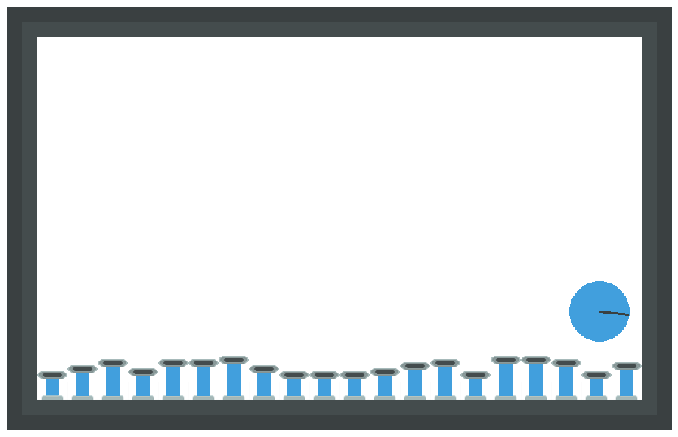

In [26]:
ani = save_frames_as_gif(frames)
plt.show()

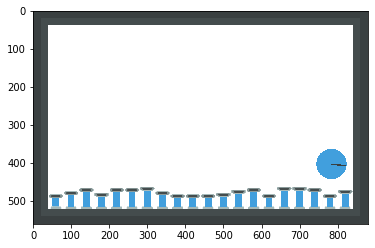

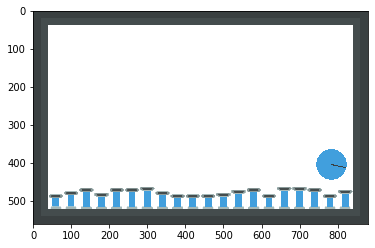

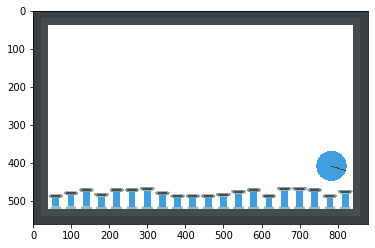

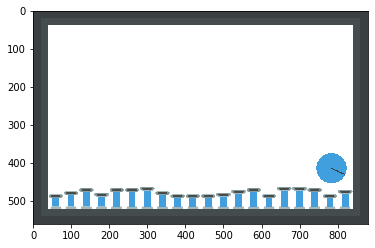

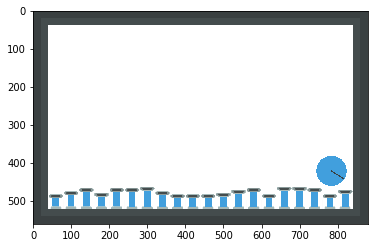

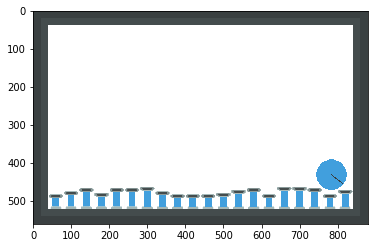

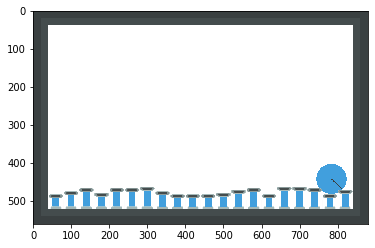

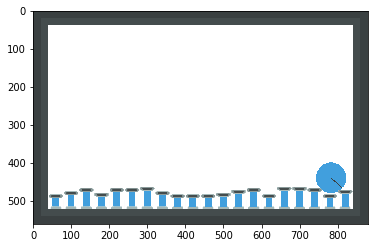

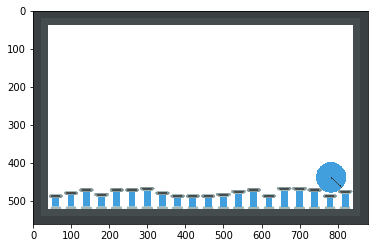

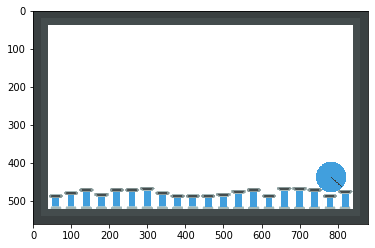

In [36]:

for i in range(10):

#     fig = plt.figure()
    plt.imshow(frames[i])
    plt.show()

    

In [87]:
def generate_video(img, folder):
    directory = os.getcwd()
    print('directory', directory)
    for i in range(len(img)):
        plt.imshow(img[i])
        plt.savefig(folder + "/file%02d.png" % i)

    os.chdir(folder)
    print('directory', directory)
    subprocess.call([
        'ffmpeg', '-framerate', '1', '-i', 'file%02d.png', '-r', '1', '-pix_fmt', 'yuv420p',
        'video_name.mp4'
    ])
    for file_name in glob.glob("*.png"):
        os.remove(file_name)
        
    os.chdir('../')
    print('directory', directory)
    plt.close()
    

In [88]:
import matplotlib.cm as cm
import subprocess
import glob
# os.chdir('PantheonRL/notebooks')
generate_video(frames, 'images')

directory /home/mzhao2/PantheonRL/notebooks
directory /home/mzhao2/PantheonRL/notebooks
directory /home/mzhao2/PantheonRL/notebooks


In [89]:
from IPython.display import Video

Video("images/video_name.mp4")